# Смотрим на данные.

In [1]:
import pandas as pd

In [2]:
tab = pd.read_json("data.json")

In [3]:
tab.columns

Index(['query', 'ts', 'platform'], dtype='object')

In [4]:
len(tab)

1203824

In [5]:
tab.head()

,query,ts,platform
0,порно фото,1631786697,touch
1,малевич картины,1631806465,desktop
2,Секс,1631781583,touch
3,с днём рождения лена,1631771563,touch
4,зверополис порно,1631787599,touch


In [6]:
tab['platform'].value_counts(normalize=True)

platform
touch      0.658118
desktop    0.341882
Name: proportion, dtype: float64

In [7]:
tab['ts'].describe()

count    1.203824e+06
mean     1.631374e+09
std      5.292754e+05
min      1.630444e+09
25%      1.630929e+09
50%      1.631380e+09
75%      1.631818e+09
max      1.632258e+09
Name: ts, dtype: float64

In [8]:
tab['ts'].min()

1630443600

In [9]:
len(tab['query'].drop_duplicates())

25737

In [10]:
len(tab['query'].str.lower().drop_duplicates())

24026

In [11]:
tab['query_norm'] = tab['query'].str.lower()

# Вопрос 1.

In [12]:
tab_desktop = tab.loc[tab['platform'] == 'desktop']
tab_touch = tab.loc[tab['platform'] == 'touch']

In [13]:
tab_desktop_agg = tab_desktop['query_norm'].value_counts(normalize=True).reset_index()

In [14]:
tab_desktop_agg.head(10)

,query_norm,proportion
0,календарь 2021,0.006828
1,таблица менделеева,0.006461
2,картинки,0.004179
3,порно,0.003421
4,английский алфавит,0.003285
5,обои на рабочий стол,0.002777
6,одноклассники (социальная сеть),0.002712
7,секс,0.002301
8,алфавит,0.002243
9,таблица квадратов,0.002145


In [15]:
tab_touch_agg = tab_touch['query_norm'].value_counts(normalize=True).reset_index()

In [16]:
tab_touch_agg.head(10)

,query_norm,proportion
0,порно,0.012718
1,секс,0.010428
2,с днём рождения женщине,0.006215
3,хентай,0.005294
4,с днём рождения,0.005204
5,с днём рождения мужчине,0.004631
6,с днем рождения,0.004184
7,xxx,0.004101
8,xnxx,0.003493
9,доброе утро,0.002956


1. На мобильных устройствах более популярны неприличные запросы.
2. Относительные частоты неприличных запросов выще в 2 раза на мобильных устройствах.
3. На десктопе больше запросов познавательного характера, а на мобильных устройствах --- поздравления и подарки.

# Вопрос 2.

In [17]:
import datetime

In [18]:
datetime.datetime.fromtimestamp(1631786697)

datetime.datetime(2021, 9, 16, 13, 4, 57)

In [19]:
tab['timestamp'] = tab['ts'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [20]:
tab['hour'] = tab['timestamp'].apply(lambda x: x.hour)

<Axes: >

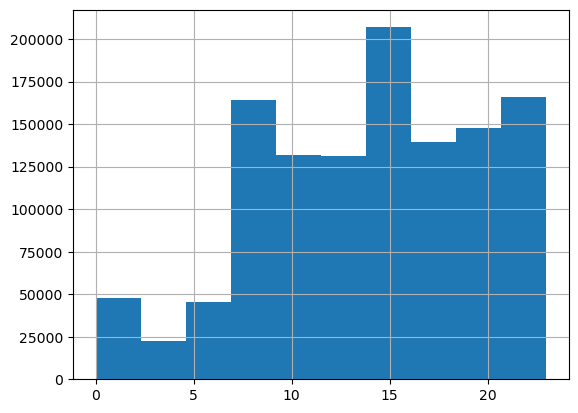

In [21]:
tab['hour'].hist()

In [22]:
tab_desktop = tab.loc[tab['platform'] == 'desktop']
tab_touch = tab.loc[tab['platform'] == 'touch']

<Axes: >

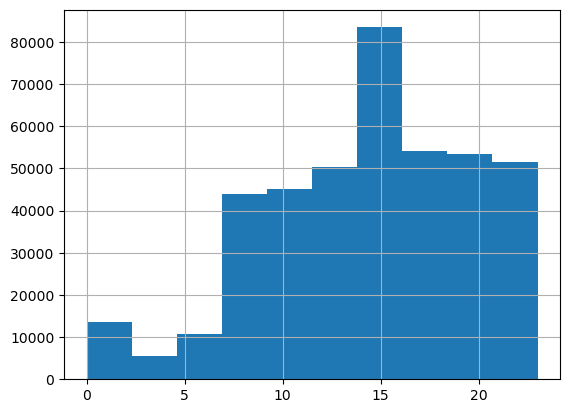

In [23]:
tab_desktop['hour'].hist()

<Axes: >

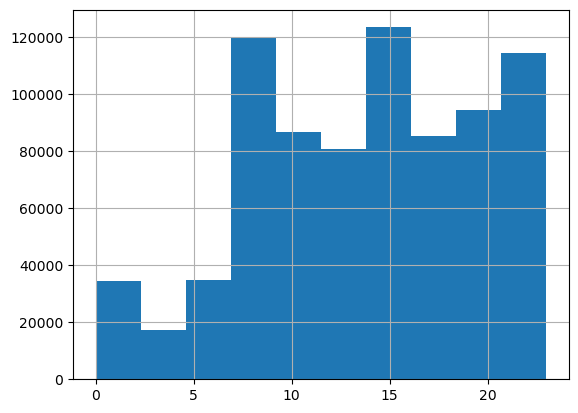

In [24]:
tab_touch['hour'].hist()

1. Мы видим, что на десктопе у нас унимодальное распределение с пиком в 15:00.
2. Мы видим, что на мобильных устройствах у нас 3 моды с пиками рано утром, в 15:00 и поздно вечером.
3. Отличие можно объяснить тем, что за десктопами обычно работают днём, а за мобильными устройствами утром, днём и вечером.
4. Возможно, что утренний пик на мобильных устройствах --- начало рабочего дня, а вечерний пик на мобильных устройствах -- конец рабочего дня.

In [25]:
len(tab_desktop['query_norm'].drop_duplicates())

22742

In [26]:
len(tab_touch['query_norm'].drop_duplicates())

23851

# Вопрос 3.

In [27]:
len(tab_desktop.loc[tab_desktop['query_norm'].isin(["порно", "секс"])]), len(tab_desktop) 

(2355, 411566)

In [28]:
len(tab_touch.loc[tab_touch['query_norm'].isin(["порно", "секс"])]), len(tab_touch) 

(18338, 792258)

In [29]:
import statsmodels

In [30]:
import statsmodels.stats.proportion

In [31]:
statsmodels.stats.proportion.proportion_confint(2355, 411566)

(0.005491606960269412, 0.005952487061102615)

In [32]:
statsmodels.stats.proportion.proportion_confint(18338, 792258)

(0.02281539036062983, 0.023477610151829496)

In [33]:
import scipy

In [34]:
scipy.stats.binomtest(2355, 411566)

BinomTestResult(k=2355, n=411566, alternative='two-sided', statistic=0.005722047010686014, pvalue=0.0)

In [35]:
scipy.stats.binomtest(2355, 411566).proportion_ci(confidence_level=0.95, method="exact")

ConfidenceInterval(low=0.005493877379548031, high=0.005957217061059328)

In [36]:
scipy.stats.binomtest(18338, 792258).proportion_ci(confidence_level=0.95, method="exact")

ConfidenceInterval(low=0.022816503491593965, high=0.023479989937053924)

Из R:

binom.confint(2355, 411566)


          method    x      n        mean       lower       upper
1  agresti-coull 2355 411566 0.005722047 0.005496129 0.00595719

2
2     asymptotic 2355 411566 0.005722047 0.005491607 0.0059524

87
3         bayes* 2355 411566 0.005723248 0.005493490 0.005954

357
4        cloglog 2355 411566 0.005722047 0.005495320 0.00595

6257
5          exact 2355 411566 0.005722047 0.005493877 0.0059

57217
6          logit 2355 411566 0.005722047 0.005496160 0.005

957162
7         probit 2355 411566 0.005722047 0.005495684 0.00

5956647
8        profile 2355 411566 0.005722047 0.005494673 0.0

05955573
9            lrt 2355 411566 0.005722047 0.005464726 0.

005959121
10     prop.test 2355 411566 0.005722047 0.005494985 0

.005958385
11        wilson 2355 411566 .005722047 
 


0.005957146
binom.confint(18


338, 792258)
          method     x      n      mean      lower      upper
1  agresti-coull 18338 792258 0.0231465 0.02281769

 0.02347994
2     asymptotic 18338 792258 0.0231465 0.02281539

 0.02347761
3          bayes 18338 792258 0.0231471 0.02281633

 0.02347855
4        cloglog 18338 792258 0.0231465 0.02281713

 0.02347935
5          exact 18338 792258 0.0231465 0.02281650

 0.02347999
6          logit 18338 792258 0.0231465 0.02281769

 0.02347993
7         probit 18338 792258 0.0231465 0.02281738

 0.02347961
8        profile 18338 792258 0.0231465 0.02281693

 0.02347915
9            lrt 18338 792258 0.0231465 0.02280594

 0.02344911
10     prop.test 18338 792258 0.0231465 0.02281707

 0.02348057
11        wilson 18338 792258 0.0231465 02281770 0.

 0.005957146

<Axes: >

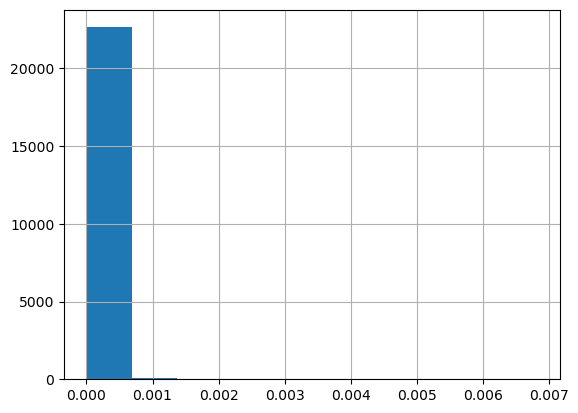

In [37]:
tab_desktop_agg['proportion'].hist()

<Axes: >

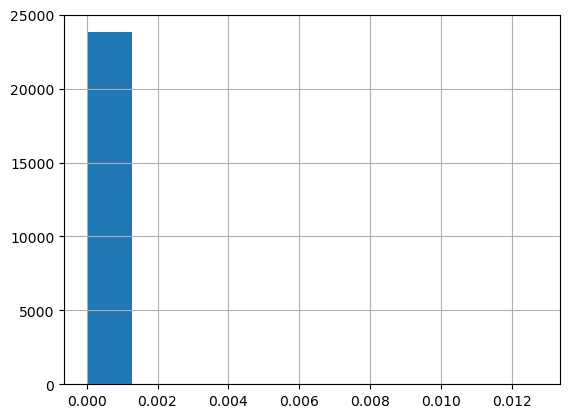

In [38]:
tab_touch_agg['proportion'].hist()

In [39]:
len(tab_desktop.loc[tab_desktop['query_norm'].isin(["порно", "секс", "хентай", "xxx"])]), len(tab_desktop) 

(3437, 411566)

In [40]:
len(tab_touch.loc[tab_touch['query_norm'].isin(["порно", "секс", "хентай", "xxx"])]), len(tab_touch) 

(25781, 792258)

In [41]:
scipy.stats.binomtest(3437, 411566).proportion_ci(confidence_level=0.95, method="exact")

ConfidenceInterval(low=0.00807525976125109, high=0.008633755125162837)

In [42]:
scipy.stats.binomtest(25781, 792258).proportion_ci(confidence_level=0.95, method="exact")

ConfidenceInterval(low=0.032151542053489676, high=0.03293421502192278)

In [43]:
statsmodels.stats.proportion.proportion_confint(3437, 411566)

(0.008073009129387567, 0.008629050807536278)

In [44]:
statsmodels.stats.proportion.proportion_confint(25781, 792258)

(0.03215046339092257, 0.0329318708991698)

In [45]:
len(tab_desktop.loc[tab_desktop['query_norm'].str.contains("с днём рождения")]), len(tab_desktop) 

(4134, 411566)

In [46]:
len(tab_touch.loc[tab_touch['query_norm'].str.contains("с днём рождения")]), len(tab_touch) 

(43782, 792258)

In [47]:
statsmodels.stats.proportion.proportion_confint(4134, 411566)

(0.009739911169015937, 0.010349211839201455)

In [48]:
statsmodels.stats.proportion.proportion_confint(43782, 792258)

(0.05475916551227229, 0.05576543632197867)

In [49]:
len(tab_desktop.loc[tab_desktop['query_norm'].str.contains("алфавит")]), len(tab_desktop) 

(5794, 411566)

In [50]:
len(tab_touch.loc[tab_touch['query_norm'].str.contains("алфавит")]), len(tab_touch) 

(6791, 792258)

In [51]:
statsmodels.stats.proportion.proportion_confint(5794, 411566)


(0.013718005561282063, 0.014437867372828142)

In [52]:
statsmodels.stats.proportion.proportion_confint(6791, 411566)

(0.016111200391871455, 0.016889581985681596)

1. Мы видим, что разница в долях присутствия запросов на порно и сэкс в мобильных устройствах и десктопных устройствах статистически значима.
2. Мы видим, что это разница статистически значима даже, если мы ослабляем понятия неприличных запросов.
3. Мы видим, что на мобильных устройствах разница в количестве поздравлений с днём рождения тоже статистически значима.
4. Разница в запросах, связанных с алфавитом (запросы для детей) не статистически значима.
5. В целом можно продолжить дальнейший сравнительный анализ с помощью тематического моделирования (bertopic).